## 束搜索
在 9.7节中，我们逐个预测输出序列，直到预测序列中出现特定的序列结束词元“<eos>”。本节将⾸先介绍贪
⼼搜索（greedy search）策略，并探讨其存在的问题，然后对⽐其他替代策略：穷举搜索（exhaustive search）
和束搜索（beam search）。

在正式介绍贪⼼搜索之前，我们使⽤与 9.7节中相同的数学符号定义搜索问题。在任意时间步t
′，解码器输出yt′的概率取决于时间步t′之前的输出⼦序列y1, . . . , yt′−1 和对输⼊序列的信息进⾏编码得到的上下⽂变
量c。为了量化计算代价，⽤Y表⽰输出词表，其中包含“<eos>”，所以这个词汇集合的基数|Y|就是词表的⼤⼩。我们还将输出序列的最⼤词元数指定为T
′。因此，我们的⽬标是从所有O(|Y|T′)个可能的输出序列中寻找理想的输出。当然，对于所有输出序列，在“<eos>”之后的部分（⾮本句）将在实际输出中丢弃。


## 贪心搜索
看看⼀个简单的策略：贪⼼搜索，该策略已⽤于 9.7节的序列预测。对于输出序列的每⼀时间
步t′，我们都将基于贪⼼搜索从Y中找到具有最⾼条件概率的词元，即：  
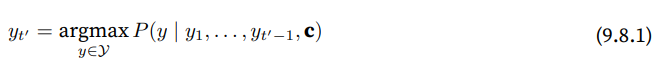  

⼀旦输出序列包含了“<eos>”或者达到其最⼤⻓度T′，则输出完成。  
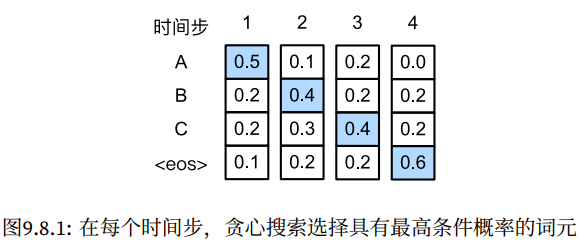  

如 图9.8.1中，假设输出中有四个词元“A”“B”“C”和“<eos>”。每个时间步下的四个数字分别表⽰在该时间步
⽣成“A”“B”“C”和“<eos>”的条件概率。在每个时间步，贪⼼搜索选择具有最⾼条件概率的词元。因此，将
在 图9.8.1中预测输出序列“A”“B”“C”和“<eos>”。这个输出序列的条件概率是 0.5×0.4×0.4×0.6 = 0.048。

那么贪⼼搜索存在的问题是什么呢？现实中，最优序列（optimal sequence）应该是最⼤化 ∏T′t
′=1 P(yt′ |y1, . . . , yt′−1, c) 值的输出序列，这是基于输⼊序列⽣成输出序列的条件概率。然⽽，贪⼼搜索⽆法保证得到
最优序列。

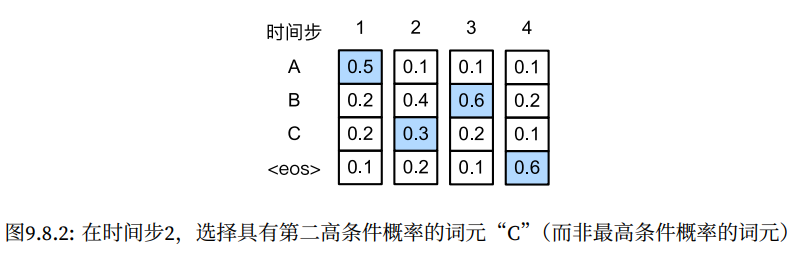

图9.8.2中的另⼀个例⼦阐述了这个问题。与 图9.8.1不同，在时间步2中，我们选择 图9.8.2中的词元“C”，它具
有第⼆⾼的条件概率。由于时间步3所基于的时间步1和2处的输出⼦序列已从 图9.8.1中的“A”和“B”改变为
图9.8.2中的“A”和“C”，因此时间步3处的每个词元的条件概率也在 图9.8.2中改变。假设我们在时间步3选
择词元“B”，于是当前的时间步4基于前三个时间步的输出⼦序列“A”“C”和“B”为条件，这与 图9.8.1中
的“A”“B”和“C”不同。因此，在 图9.8.2中的时间步4⽣成每个词元的条件概率也不同于 图9.8.1中的条件
概率。结果，图9.8.2中的输出序列“A”“C”“B”和“<eos>”的条件概率为 0.5 × 0.3 × 0.6 × 0.6 = 0.054，这
⼤于 图9.8.1中的贪⼼搜索的条件概率。这个例⼦说明：贪⼼搜索获得的输出序列“A”“B”“C”和“<eos>”
不⼀定是最佳序列。


## 穷举搜索
如果⽬标是获得最优序列，我们可以考虑使⽤穷举搜索（exhaustive search）：穷举地列举所有可能的输出序
列及其条件概率，然后计算输出条件概率最⾼的⼀个。

虽然我们可以使⽤穷举搜索来获得最优序列，但其计算量O(|Y|T′)可能⾼的惊⼈。例如，当|Y| = 10000和T
′ =10时，我们需要评估1000010 = 1040序列，这是⼀个极⼤的数，现有的计算机⼏乎不可能计算它。然⽽，贪
⼼搜索的计算量 O(|Y| T′) 通它要显著地⼩于穷举搜索。例如，当|Y| = 10000和T′ = 10时，我们只需要评
估10000 × 10 = 105个序列。

## 束搜索
那么该选取哪种序列搜索策略呢？如果精度最重要，则显然是穷举搜索。如果计算成本最重要，则显然是贪
⼼搜索。⽽束搜索的实际应⽤则介于这两个极端之间。

束搜索（beam search）是贪⼼搜索的⼀个改进版本。它有⼀个超参数，名为束宽（beam size）k。在时间
步1，我们选择具有最⾼条件概率的k个词元。这k个词元将分别是k个候选输出序列的第⼀个词元。在随后的
每个时间步，基于上⼀时间步的k个候选输出序列，我们将继续从k |Y|个可能的选择中挑出具有最⾼条件概
率的k个候选输出序列。
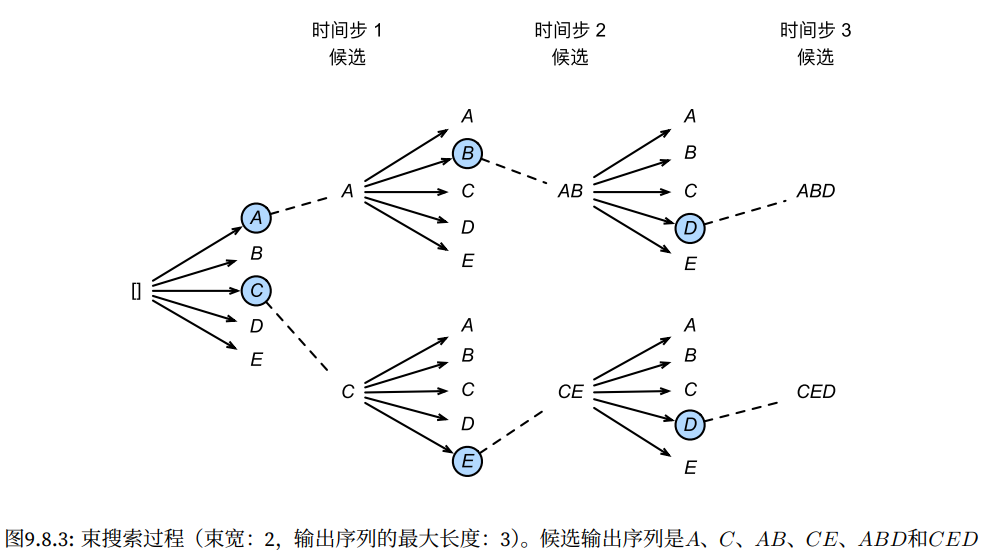  

图9.8.3演⽰了束搜索的过程。假设输出的词表只包含五个元素：Y = {A, B, C, D, E}，其中有⼀个是“<eos>”。
设置束宽为2，输出序列的最⼤⻓度为3。在时间步1，假设具有最⾼条件概率 P(y1 | c)的词元是A和C。在时
间步2，我们计算所有y2 ∈ Y为：  
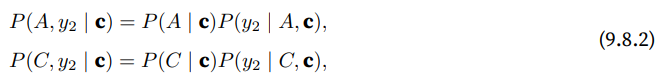  

从这⼗个值中选择最⼤的两个，⽐如P(A, B | c)和P(C, E | c)。然后在时间步3，我们计算所有y3 ∈ Y为：

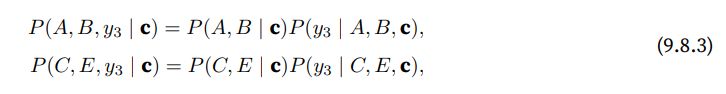  

从这⼗个值中选择最⼤的两个，即P(A, B, D | c)和P(C, E, D | c)，我们会得到六个候选输出序列：（1）A；（2）
C；（3）A, B；（4）C, E；（5）A, B, D；（6）C, E, D。  
最后，基于这六个序列（例如，丢弃包括“<eos>”和之后的部分），我们获得最终候选输出序列集合。然后
我们选择其中条件概率乘积最⾼的序列作为输出序列：  
 
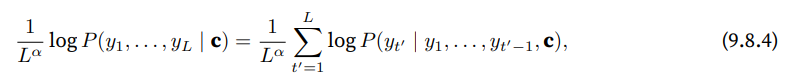  

其中L是最终候选序列的⻓度，α通常设置为0.75。因为⼀个较⻓的序列在 (9.8.4) 的求和中会有更多的对数
项，因此分⺟中的Lα⽤于惩罚⻓序列。束搜索的计算量为O(k |Y| T′)，这个结果介于贪⼼搜索和穷举搜索之间。实际上，贪⼼搜索可以看作⼀种束
宽为1的特殊类型的束搜索。通过灵活地选择束宽，束搜索可以在正确率和计算代价之间进⾏权衡。

## 小结
* 序列搜索策略包括贪⼼搜索、穷举搜索和束搜索。
* 贪⼼搜索所选取序列的计算量最⼩，但精度相对较低。
* 穷举搜索所选取序列的精度最⾼，但计算量最⼤。
* 束搜索通过灵活选择束宽，在正确率和计算代价之间进⾏权衡。